In [31]:
library(LalRUtils)
libreq(data.table, tidyverse, sf, anytime, lubridate, plotly, zoo, patchwork, ggrepel,
      janitor)
theme_set(lal_plot_theme_d())
options(repr.plot.width = 20, repr.plot.height=12)

      wants        loaded
 [1,] "data.table" TRUE  
 [2,] "tidyverse"  TRUE  
 [3,] "sf"         TRUE  
 [4,] "anytime"    TRUE  
 [5,] "lubridate"  TRUE  
 [6,] "plotly"     TRUE  
 [7,] "zoo"        TRUE  
 [8,] "patchwork"  TRUE  
 [9,] "ggrepel"    TRUE  
[10,] "janitor"    TRUE  


In [32]:
rollmeaneR = function(df, 
                      smoothvars = rawvars,
                      grouping = c("state"),
                      sm_k = 5){
    f = copy(df)
    setorderv(f, cols = c(grouping, 'd'))
    f[, paste0("rm", "_", smoothvars) := lapply(.SD, rollmean, k = sm_k, fill = NA, na.pad = T), 
       by = grouping, .SDcols = smoothvars]
    return(f)
}

# Agg Time Series 

In [42]:
d6 = fread("https://api.covid19india.org/csv/latest/case_time_series.csv") %>% clean_names()
d6[, d := anydate(paste0(date, " 2020"))] 
d6[, g := 1]
d6[, cfr := total_deceased/total_confirmed]
smvars = c("daily_confirmed", "total_confirmed", "daily_deceased", "total_deceased", "cfr")
d6 = rollmeaneR(d6, smoothvars = smvars, grouping = 'g')
d6 %>% glimpse

Rows: 89
Columns: 15
$ date               <chr> "30 January", "31 January", "01 February", "02 Feb…
$ daily_confirmed    <int> 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ total_confirmed    <int> 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,…
$ daily_recovered    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…
$ total_recovered    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,…
$ daily_deceased     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ total_deceased     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ d                  <date> 2020-01-30, 2020-01-31, 2020-02-01, 2020-02-02, 2…
$ g                  <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ cfr                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ rm_daily_confirmed <dbl> NA, NA, 0.6, 0.4, 0.4, 0.4, 0.2, 0.0, 0.0, 0.0, 0.…
$ rm_total_confirmed <dbl> NA, NA, 1.6, 2.0, 2.4, 2.8, 3.0, 3.0, 3.0, 3.0, 3.…
$ rm_daily_deceased  <dbl> NA, 

In [17]:
d7 = fread("https://api.covid19india.org/csv/latest/tested_numbers_icmr_data.csv") %>% clean_names
d7 %>% glimpse

Rows: 49
Columns: 12
$ update_time_stamp                     <chr> "13/03/2020 00:00:00", "18/03/2…
$ total_samples_tested                  <int> 6500, 13125, 13316, 14175, 1437…
$ total_individuals_tested              <int> 5900, 12235, 12426, 13285, 1348…
$ total_positive_cases                  <chr> "78", "150", "168", "182", "206…
$ tests_conducted_by_private_labs       <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ sample_reported_today                 <chr> "", "", "", "", "", "", "", "",…
$ positive_cases_from_samples_reported  <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ source                                <chr> "Press_Release_ICMR_13March2020…
$ v9                                    <lgl> NA, NA, NA, NA, NA, NA, NA, NA,…
$ test_positivity_rate                  <chr> "1.32%", "1.23%", "1.35%", "1.3…
$ individuals_tested_per_confirmed_case <dbl> 75.64, 81.57, 73.96, 72.99, 65.…
$ tests_per_confirmed_case              <dbl> 83.33, 87.50, 79.26, 77.88, 69.…


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


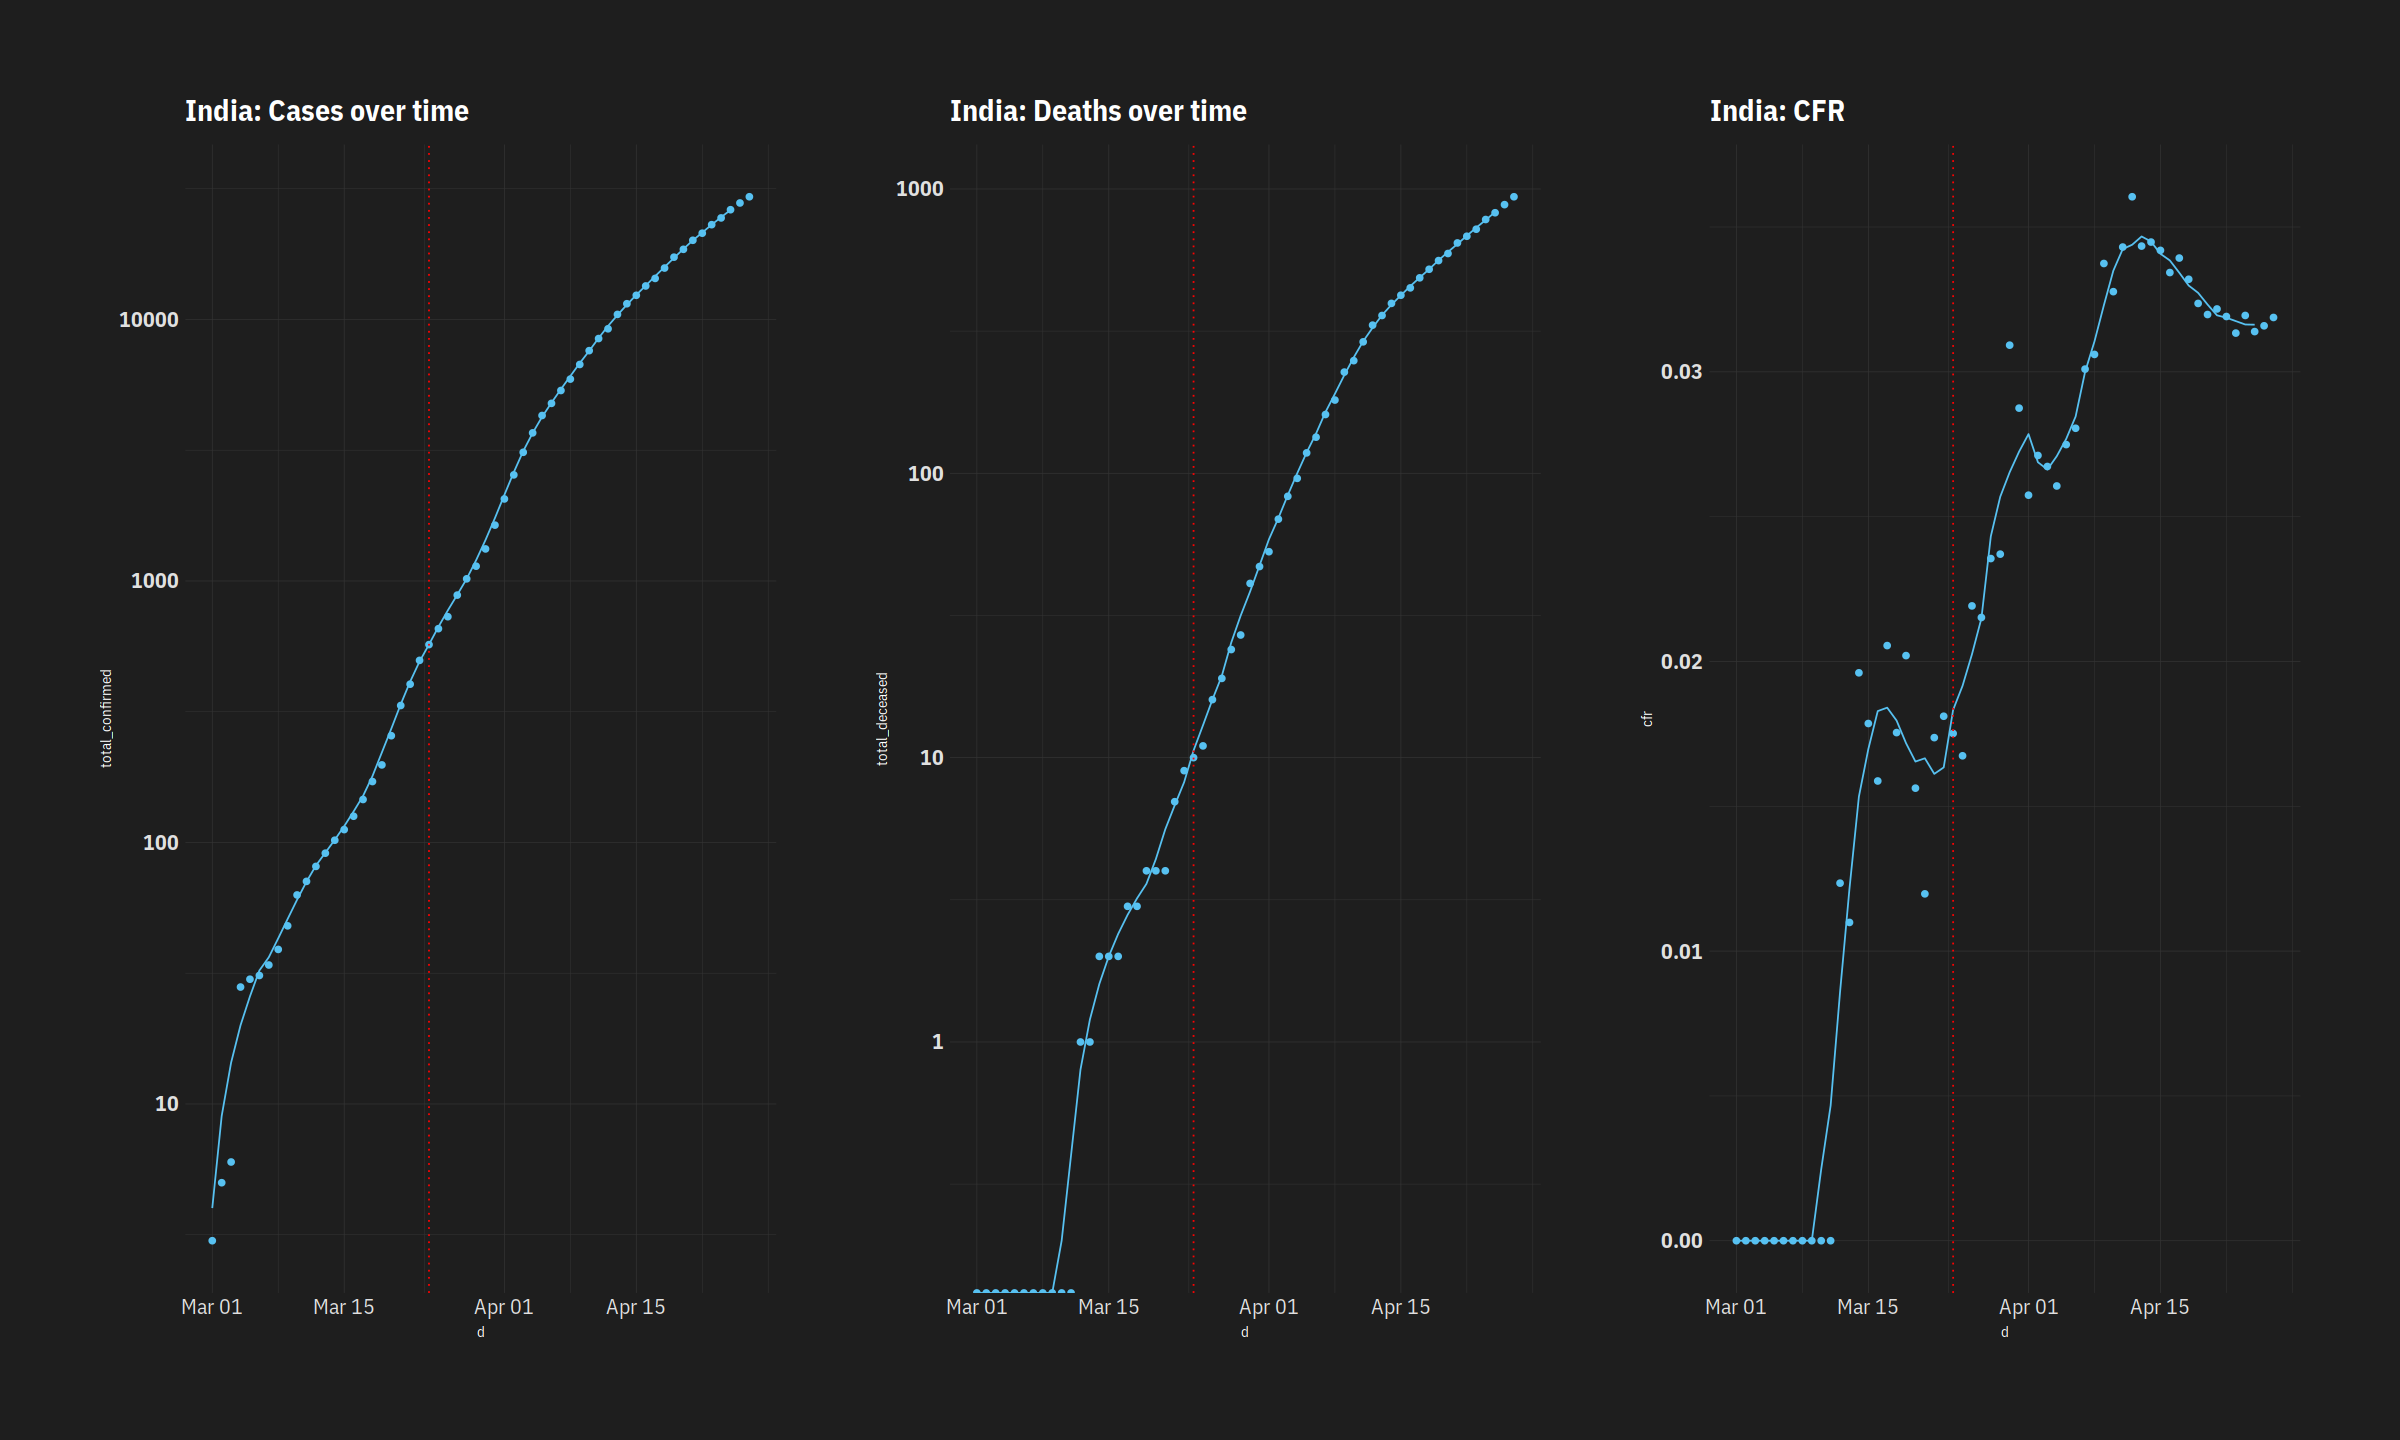

In [43]:
p1 = d6[d >= "2020-03-01"] %>% 
    ggplot(aes(x = d)) + 
    geom_point(aes(y = total_confirmed)) +
    geom_line(aes(y = rm_total_confirmed)) +
    geom_vline(xintercept = as.numeric(as.Date("2020-03-24")), colour = 'Red', linetype = "dotted") +
    scale_y_log10() + ggtitle("India: Cases over time")
p2 = d6[d >= "2020-03-01"] %>% 
    ggplot(aes(x = d)) + 
    geom_point(aes(y = total_deceased)) +
    geom_line(aes(y = rm_total_deceased)) +
    geom_vline(xintercept = as.numeric(as.Date("2020-03-24")), colour = 'Red', linetype = "dotted") +
    scale_y_log10()+ ggtitle("India: Deaths over time")
p3 = d6[d >= "2020-03-01"] %>% 
    ggplot(aes(x = d)) + 
    geom_point(aes(y = cfr)) +
    geom_line(aes(y = rm_cfr)) +
    geom_vline(xintercept = as.numeric(as.Date("2020-03-24")), colour = 'Red', linetype = "dotted") +
    ggtitle("India: CFR")
p1 | p2 | p3

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


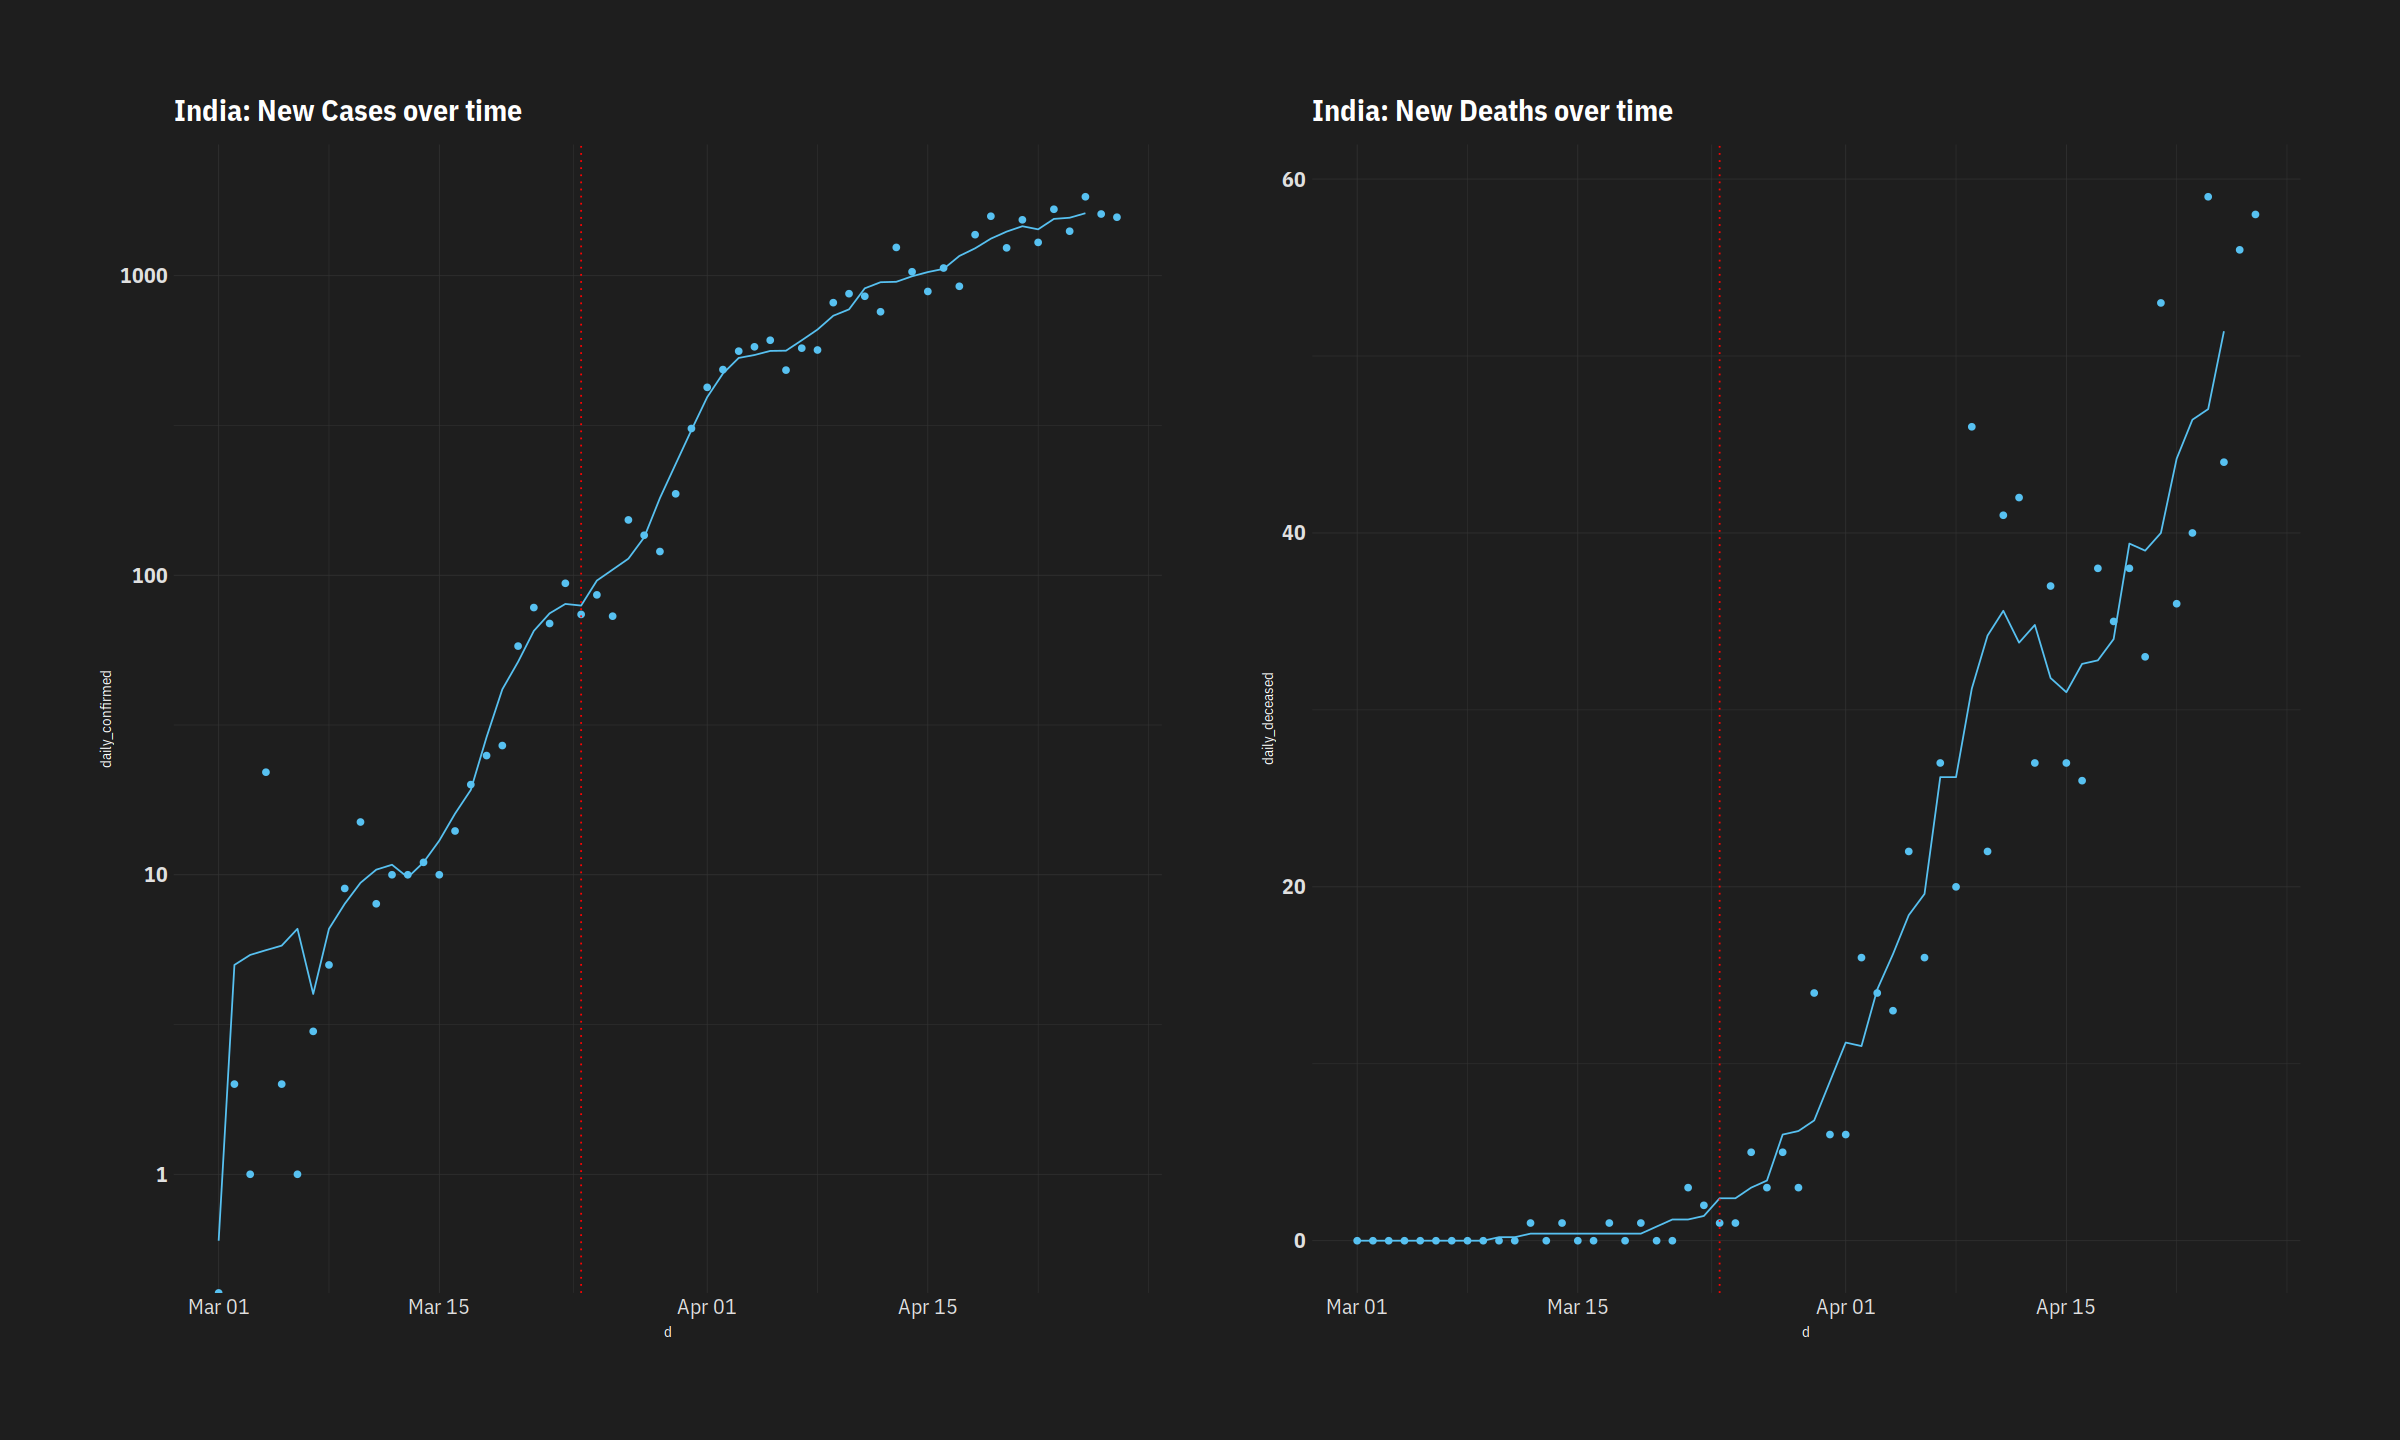

In [39]:
p1 = d6[d >= "2020-03-01"] %>% 
    ggplot(aes(x = d)) + 
    geom_point(aes(y = daily_confirmed)) +
    geom_line(aes(y = rm_daily_confirmed)) +
    geom_vline(xintercept = as.numeric(as.Date("2020-03-24")), colour = 'Red', linetype = "dotted") +
    scale_y_log10() + ggtitle("India: New Cases over time")
p2 = d6[d >= "2020-03-01"] %>% 
    ggplot(aes(x = d)) + 
    geom_point(aes(y = daily_deceased)) +
    geom_line(aes(y = rm_daily_deceased)) +
    geom_vline(xintercept = as.numeric(as.Date("2020-03-24")), colour = 'Red', linetype = "dotted") +
    ggtitle("India: New Deaths over time")

p1 | p2

# Micro 

In [6]:
d1 = fread("https://api.covid19india.org/csv/latest/raw_data.csv") %>% clean_names()
d1 %>% glimpse

Rows: 27,891
Columns: 20
$ patient_number                          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10…
$ state_patient_number                    <chr> "KL-TS-P1", "KL-AL-P1", "KL-K…
$ date_announced                          <chr> "30/01/2020", "02/02/2020", "…
$ estimated_onset_date                    <lgl> NA, NA, NA, NA, NA, NA, NA, N…
$ age_bracket                             <chr> "20", "", "", "45", "24", "69…
$ gender                                  <chr> "F", "", "", "M", "M", "M", "…
$ detected_city                           <chr> "Thrissur", "Alappuzha", "Kas…
$ detected_district                       <chr> "Thrissur", "Alappuzha", "Kas…
$ detected_state                          <chr> "Kerala", "Kerala", "Kerala",…
$ state_code                              <chr> "KL", "KL", "KL", "DL", "TG",…
$ current_status                          <chr> "Recovered", "Recovered", "Re…
$ notes                                   <chr> "Travelled from Wuhan", "Trav…
$ contracted_from_which_pat

In [76]:
d1[, d := anydate(date_announced)]

# State Level 

In [64]:
d5 = fread("https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv") %>% clean_names()
d5 %>% glimpse

Rows: 600
Columns: 20
$ updated_on                            <chr> "17/04/2020", "24/04/2020", "27…
$ state                                 <chr> "Andaman and Nicobar Islands", …
$ total_tested                          <int> 1403, 2679, 2848, 1800, 6374, 6…
$ positive                              <int> 12, 27, 33, 132, 365, 381, 405,…
$ negative                              <int> 1210, NA, NA, 1175, 6009, 6577,…
$ unconfirmed                           <int> 181, 246, 106, 493, NA, NA, NA,…
$ total_people_in_quarantine            <int> NA, NA, NA, 179, NA, NA, NA, NA…
$ total_people_released_from_quarantine <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ num_isolation_beds                    <int> 50, 50, 50, 23479, NA, NA, NA, …
$ num_icu_beds                          <int> NA, NA, NA, 2680, NA, NA, NA, N…
$ num_ventilators                       <int> NA, NA, NA, 330, NA, NA, NA, NA…
$ num_calls_state_helpline              <int> NA, 280, 298, NA, NA, NA, NA, N…
$ source                      

In [66]:
d4 = fread("https://api.covid19india.org/csv/latest/state_wise_daily.csv") %>% clean_names()
d4[, d := as.Date(date, "%d-%b-%y")][, date := NULL]
d4 %>% glimpse

Rows: 135
Columns: 40
$ status <chr> "Confirmed", "Recovered", "Deceased", "Confirmed", "Recovered"…
$ tt     <int> 81, 9, 2, 27, 4, 0, 15, 1, 0, 11, 1, 1, 37, 0, 0, 27, 5, 1, 58…
$ an     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ ap     <int> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,…
$ ar     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ as     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ br     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ ch     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0,…
$ ct     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,…
$ dn     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ dd     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ dl     <int> 7, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 4, 1, 0, 6, 2, 0,…
$ ga     <int> 0, 0, 0, 0, 0, 

In [67]:
melted = melt(d4, id.vars = c("d", "status"))
melted %>% head

d,status,variable,value
<date>,<chr>,<fct>,<int>
2020-03-14,Confirmed,tt,81
2020-03-14,Recovered,tt,9
2020-03-14,Deceased,tt,2
2020-03-15,Confirmed,tt,27
2020-03-15,Recovered,tt,4
2020-03-15,Deceased,tt,0


In [68]:
case_panel = melted[status == "Confirmed" & variable != 'tt'][, status := NULL] %>% 
    setnames("variable", 'state')
case_panel %>% glimpse

Rows: 1,665
Columns: 3
$ d     <date> 2020-03-14, 2020-03-15, 2020-03-16, 2020-03-17, 2020-03-18, 20…
$ state <fct> an, an, an, an, an, an, an, an, an, an, an, an, an, an, an, an,…
$ value <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 3, 0, 1, 0, 0, 0, 0, …


In [74]:
case_panel[, sum(value), by = state][order(-V1)][1:10]

state,V1
<fct>,<int>
mh,8590
gj,3548
dl,3108
rj,2262
up,1986
tn,1937
ap,1177
tg,1003
wb,649


In [69]:
death_panel = melted[status == "Deceased" & variable != 'tt'][, status := NULL] %>% 
    setnames("variable", 'state')
death_panel %>% glimpse

Rows: 1,665
Columns: 3
$ d     <date> 2020-03-14, 2020-03-15, 2020-03-16, 2020-03-17, 2020-03-18, 20…
$ state <fct> an, an, an, an, an, an, an, an, an, an, an, an, an, an, an, an,…
$ value <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [75]:
death_panel[, sum(value), by = state][order(-V1)][1:10]

state,V1
<fct>,<int>
mh,368
gj,162
mp,111
dl,54
rj,50
ap,31
up,31
tg,25
tn,24


# Appendix 

In [14]:
src = fread("https://api.covid19india.org/csv/latest/sources_list.csv")
src %>% head

Region,State_Code,Source_1,Source_2,Source_3,Source_4,Source_5,Source_6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Andaman and Nicobar Islands,AN,https://twitter.com/ChetanSanghi,,,,,
Andhra Pradesh,AP,https://twitter.com/ArogyaAndhra,http://hmfw.ap.gov.in/covid_dashboard.aspx,,,,
Arunachal Pradesh,AR,https://twitter.com/PemaKhanduBJP,http://covid19.itanagarsmartcity.in/covidstatus.php,,,,
Assam,AS,https://assam.gov.in/covid-19-advisory.html,https://twitter.com/himantabiswa,https://twitter.com/nhm_assam,,,
Bihar,BR,https://twitter.com/BiharHealthDept,https://twitter.com/PIB_Patna,https://twitter.com/sanjayjavin,https://twitter.com/mangalpandeybjp,,
Chandigarh,CH,http://chdcovid19.in/,https://twitter.com/PIBChandigarh,,,,
